# Convert a  image into a line drawing
Let us import the necessary libraries first

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
# from sklearn.cluster import mean_shift

## Image pre-processing step

### Noise Reduction
One way to get rid of the noise on the image, is by applying Gaussian blur to smooth it.

So, let us implement a Gaussian kernel in order to apply it to our image.

$$ g(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}}
$$

In [39]:
def gaussian_kernel(k_size, sigma=1):
    # divide the size, so kernel will have the symmetry in size
    k_size = int(k_size)//2
    # generate the rectangular meshgrid for the gaussian kernel
    x, mu = np.mgrid[-k_size:k_size+1, -k_size:k_size+1]
    # normalized factor
    normal_factor = 1/(2.*np.pi*sigma**2)
    kernel = normal_factor * np.exp(-((x**2 + mu**2)/(2.0*sigma**2)))
    return kernel

### Convolvution
To produce the new filtered image given the image convolving with the given kernel

In [40]:
def convolve(image, kernel):
    new_image = np.zeros(image.shape)
    for x in range(len(image)):
        for y in range(len(image[0])):
            for i in range(len(kernel)):
                for j in range(len(kernel[0])):
                    if x-i >=0 and x-i < len(image) and y-j >=0 and y-j < len(image[0]):
                        new_image[x, y] += image[x-i, y-j] * kernel[i, j]

    return new_image

Now, let's create a noise reduction function by convolving above function with the image

In [41]:
def noise_reduce(image,sigma=40):
    # convert the type to floating-point type
    new_image = image.astype(np.float).copy()
    # if the image has three or more dimensions
    # we will reduce to two dimensions with a normalized factor
    if len(new_image.shape) > 2:
        _,_, dim = new_image.shape
        if dim > 1:
            gray_image = 0.2126 * new_image[:,:,0] + 0.7152 * new_image[:,:,1] + 0.0722 * new_image[:,:,2]
    else: gray_image = new_image
    # create a Gaussian kernal size of 5
    kernel = gaussian_kernel(5,sigma)
    # Convolve the image with gaussian kernel
    convolved_image = convolve(gray_image, kernel)
    # return scipy.signal.convolve2d(gray_image, kernel,
    #                           mode='same', boundary='fill', fillvalue=0)
    return convolved_image

In [42]:
def plot_two_images(image1, image2, title1=None, title2=None, size=(16,8)):
    f = plt.figure(figsize=size)
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax1.imshow(image1, cmap='gray')
    ax1.set_xticks([]),ax1.set_yticks([])
    ax1.set_title(title1,color='white')
    ax2.imshow(image2, cmap='gray')
    ax2.set_xticks([]),ax2.set_yticks([])
    ax2.set_title(title2,color='white')

Let's try our noise reduction function

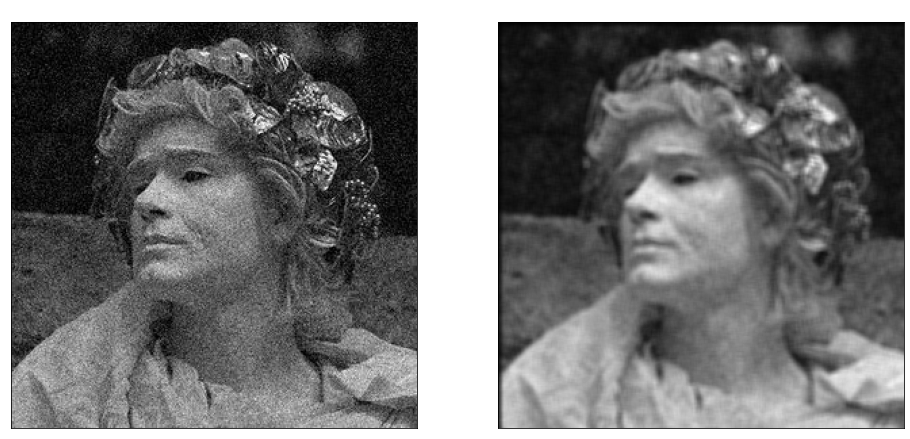

In [43]:
image = mpimg.imread('images/sample.jpg')
gray_image = image[:,:,0]
reduced_noise_image = noise_reduce(gray_image)
plot_two_images(gray_image,reduced_noise_image,'Noise Image','Reduced Noise Image')


Sharpen filter
$$
	\begin{bmatrix} 
	0 & -1 & 0 \\
	-1 & 5 & -1\\
	0 & -1 & 0 \\
	\end{bmatrix}
	\quad
	$$

In [44]:
def sharpen(image):
    new_image = image.copy()
    sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype = np.float)
    return convolve(new_image, sharpen)

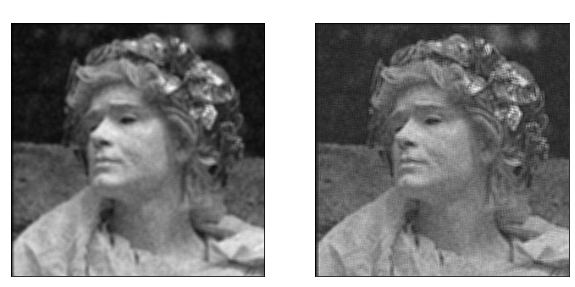

In [45]:
sharpened_image = sharpen(reduced_noise_image)
plot_two_images(reduced_noise_image,sharpened_image,'Reduced Noise Image','Sharpened Image',(10,5))

### Sobel Operator

Now, we would like to detect the edges from the image. Sobel Operator is one of the algorithms for the edge detection. It uses an isotropic or symmetric gradient operator or matrix to approximate the gradient intensity of the image to detect the edge

And to do so, we will convolve this kernel with the image in both horizontal and vertical directions

Sobel gradient matrix size of 3

 $ k_h = 
	\begin{bmatrix} 
	-1 & 0 & 1 \\
	-2 & 0 & 2\\
	-1 & 0 & 1 \\
	\end{bmatrix}
	\quad
	k_v = 
	\begin{bmatrix} 
	1 & 2 & 1 \\
	0 & 0 & 0\\
	-1 & -2 & -1 \\
	\end{bmatrix}
	\quad
	$

Sobel gradient matrix size of 5

 $ k_h = 
	\begin{bmatrix} 
	-1 & -2 & 0 & 2 & 1\\
	-4 & -8 & 0 & 8 & 4\\
	-6 & -12 & 0 & 12 & 6 \\
	-4 & -8 & 0 & 8 & 4 \\
	-1 & -2 & 0 & 2 & 1 \\
	\end{bmatrix}
	\quad
	k_v = 
	\begin{bmatrix} 
	1 & 4 & 6 & 4 & 1\\
	2 & 8 & 12 & 8 & 2\\
	0 & 0 & 0 & 0 & 0 \\
	-2 & -8 & -12 & -8 & -4 \\
	-1 & -4 & -6 & -4 & -1 \\
	\end{bmatrix}
	\quad
	$
	


In [46]:
def sobel_filter(image, k_size=5):

    new_image = image.astype(np.float).copy()
    
    # if the image has three or more dimensions
    # we will reduce to two dimensions with a normalized factor
    if len(new_image.shape) > 2:
        _,_, dim = new_image.shape
        if dim > 1:
            gray_image = 0.2126 * new_image[:,:,0] + 0.7152 * new_image[:,:,1] + 0.0722 * new_image[:,:,2]
    else: gray_image = new_image

    # gradient matrix
    if k_size == 3:
        Kh = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = np.float)
        Kv = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = np.float)
    else:
        Kh = np.array([[-1, -2, 0, 2, 1], 
                   [-4, -8, 0, 8, 4], 
                   [-6, -12, 0, 12, 6],
                   [-4, -8, 0, 8, 4],
                   [-1, -2, 0, 2, 1]], dtype = np.float)
        Kv = np.array([[1, 4, 6, 4, 1], 
                   [2, 8, 12, 8, 2],
                   [0, 0, 0, 0, 0], 
                   [-2, -8, -12, -8, -2],
                   [-1, -4, -6, -4, -1]], dtype = np.float)

    Gx = convolve(gray_image, Kh)
    Gy = convolve(gray_image, Kv)
    # normalize both matrices
    convolved_image = np.sqrt(Gx * Gx + Gy * Gy)
    convolved_image *= 255.0 / np.max(convolved_image)     

    return convolved_image

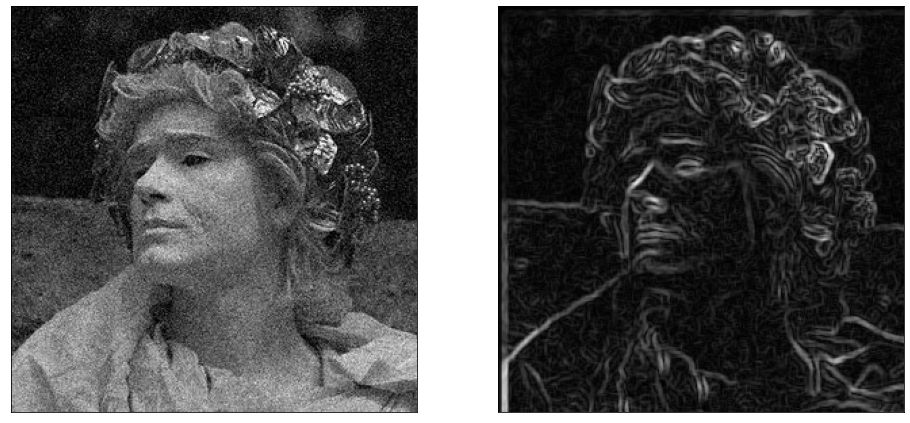

In [47]:
sobeled = np.absolute(sobel_filter(sharpened_image))
plot_two_images(gray_image,sobeled,size=(16,8))

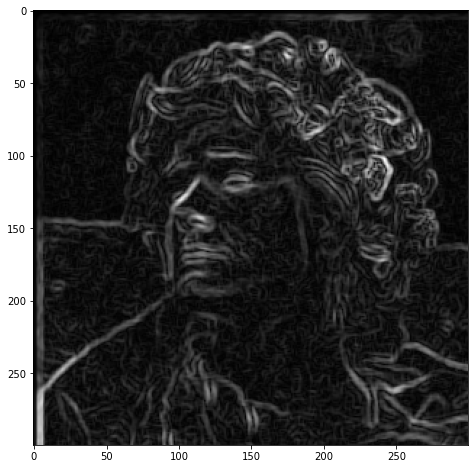

In [48]:
plt.figure(figsize=(16,8))
plt.imshow(sobeled, cmap='gray')

### Threshold

To find the points on edges.

 There are many ways to achieve this, and, these steps are one of those I will use here
1. Convert image to grayscale and Gaussian blur (we did before)
2. Threshold to obtain a binary image
3. Find the contours
4. Obtain outer coordinates

In [13]:
from sklearn.cluster import mean_shift

In [22]:
sobeled2 = sobeled.copy()

In [31]:
sobeled2[0:15] = 0
sobeled2[:,0:15] = 0

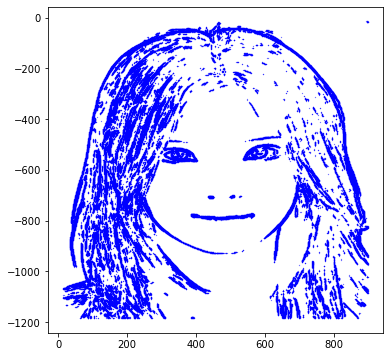

In [32]:
scatter = np.where(sobeled2>30)
plt.figure(figsize=(6,6))
x,y = scatter[1],-scatter[0]
plt.scatter(x,y,color='blue',marker='.',s=0.2)  
plt.show()

## Line Drawing Step

### Discrete Fourier Transform

To decompose an image from the x and y coordinates and reconstruct it.

We will fourier-transform the particular image to extract the real, imaginary part out of value, a frequency, an amplitude, a phase in order to construct the non-periodic function using the epicycles

$$
        X_k = \sum_{n=0}^{N-1}x_n\times e^{-\frac{i2\pi}{N}kn}
$$
$$
        = \sum_{n=0}^{N-1}x_n\times [\text{cos}(2\pi kn/N)-i\times \text{sin}(2\pi kn/N)]
$$

In [35]:
time = 0
def dft(x):
    X = []
    N = len(x)
    for k in range(N):
        re = 0
        im = 0
        for n in range(N):
            phi = (2*math.pi * k * n)/N
            re += x[n] * math.cos(phi)
            im -= x[n] * math.sin(phi)
        # normalize both real and imaginary 
        re /= N
        im /= N
        # discrete frequency component
        freq = k
        # both amplitude and phase can be derived from real and imaginary parts
        amp = math.sqrt(re*re + im*im)
        phase = math.atan2(im, re)
        X.append((re, im, freq, amp , phase))
    return X


### Epicycle or Rotating Cycle
Given a frequency, amplitude, and phase, we are able to create a different cycle stacking on top of another to draw any arbitrary line to order to determine the resulting image

![title](images/epicycle.gif)

In [ ]:
# create the epicycles for drawing
def epi_cycles(x, y, time, rotation, fourier):
    # loop through the resulting fourier 2d array
    for i in range(len(fourier)):
        # extract the information out of each row array
        freq = fourier[i][2]
        radius = fourier[i][3]
        phase = fourier[i][4]
        # this is simply the summation of fourier series to create the epicycle
        x += radius * math.cos(freq * time + phase + rotation)
        y += radius * math.sin(freq * time + phase + rotation)

    return np.array([x, y])

### Sketching Step

1. Put an array of x-y coordinates into a discrete fourier transform 
2. Extract the real, imaginary, amplitude, frequency, and phase from a discrete fourier array in order to create an epicycle 
3. Generate epicycles in both x and y direction for sketching

In [37]:
def draw_line(x,y):
    time = 0
    # epicycle array
    fourier_x = dft(x)
    fourier_y = dft(y)
    xs = []
    ys = []
    l = len(fourier_y)
    for i in range(l):
        # y is off by 90 degree from x
        # vector x and vector y
        vx = epi_cycles(0, 0, time, 0, fourier_x)
        vy = epi_cycles(0, 0, time, math.pi/2, fourier_y)
        # extract only its x and 
        xs.append(vx[0])
        ys.append(vy[1])
        dt = 2*math.pi / l
        time += dt
    return xs, ys

In [ ]:
xs,ys = draw_line(x,y)

Text(0.5, 1.0, 'Sketching Image')

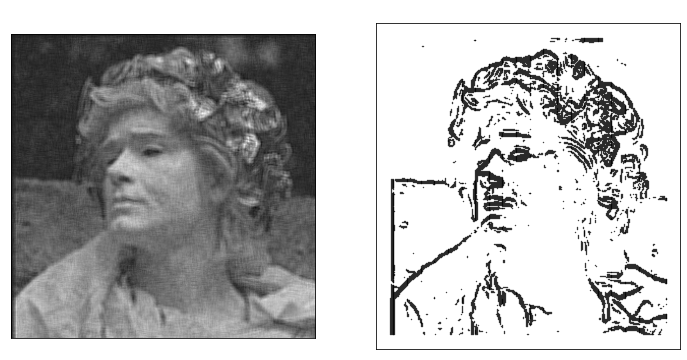

In [180]:
f = plt.figure(figsize=(12,6))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(sharpened_image, cmap='gray')
ax1.set_xticks([]),ax1.set_yticks([])
ax1.set_title('Original Image',color='white')
ax2.scatter(xs,ys,color='black',marker='.',s=0.5)  
ax2.set_xticks([]),ax2.set_yticks([])
ax2.set_title("Sketching Image",color='white')

In [50]:
ori_image2 = mpimg.imread('images/sample2.jpg')

In [59]:
image2 = ori_image2.copy()
image2[0:30] = 0
image2[:,0:30] = 0
sobeled2 = sobel_filter(image2)

In [73]:
sobeled2_copy = np.where(sobeled2>30)
plt.figure(figsize=(6,6))
xss,yss = draw_line(sobeled2_copy[1],-sobeled2_copy[0])

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Sketching Image')

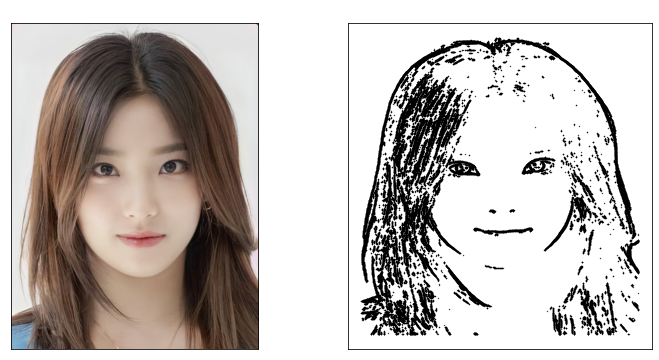

In [74]:
f = plt.figure(figsize=(12,6))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(ori_image2, cmap='gray')
ax1.set_xticks([]),ax1.set_yticks([])
ax1.set_title('Original Image',color='white')
ax2.scatter(xss,yss,color='black',marker='.',s=0.5)  
ax2.set_xticks([]),ax2.set_yticks([])
ax2.set_title("Sketching Image",color='white')